In [ ]:
!pip install chart-studio

In [1]:
# importing required modules
import pandas as pd
import numpy as np
import time
import copy
import pandas as pd
import datetime


optimal sequence [4, 10, 8, 6, 0, 0, 5, 13, 11, 12, 0, 8, 12, 4, 3, 10, 17, 2, 4, 5, 16, 14, 5, 0, 12, 13, 15, 6, 12, 1, 2, 10, 11, 6, 8, 13, 4, 16, 7, 5, 14, 11, 15, 12, 9, 19, 16, 0, 13, 19, 17, 7, 18, 17, 1, 18, 16, 10, 13, 9, 6, 16, 8, 1, 18, 3, 14, 1, 3, 11, 19, 7, 19, 15, 10, 17, 14, 2, 5, 3, 6, 11, 15, 9, 9, 2, 18, 14, 9, 17, 7, 18, 2, 3, 8, 7, 15, 1, 4, 19]
optimal value:1292.000000


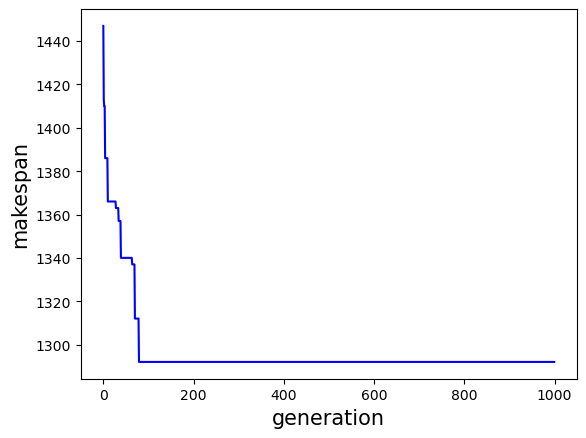

the elapsed time:24.45453691482544


"\n\n# Plot gantt chart\n\nm_keys=[j+1 for j in range(num_mc)]\nj_keys=[j for j in range(num_job)]\nkey_count={key:0 for key in j_keys}\nj_count={key:0 for key in j_keys}\nm_count={key:0 for key in m_keys}\nj_record={}\nfor i in sequence_best:\n    gen_t=int(pt[i][key_count[i]])\n    gen_m=int(ms[i][key_count[i]])\n    j_count[i]=j_count[i]+gen_t\n    m_count[gen_m]=m_count[gen_m]+gen_t\n    \n    if m_count[gen_m]<j_count[i]:\n        m_count[gen_m]=j_count[i]\n    elif m_count[gen_m]>j_count[i]:\n        j_count[i]=m_count[gen_m]\n    \n    start_time=str(datetime.timedelta(seconds=j_count[i]-pt[i][key_count[i]])) # convert seconds to hours, minutes and seconds\n    end_time=str(datetime.timedelta(seconds=j_count[i]))\n        \n    j_record[(i,gen_m)]=[start_time,end_time]\n    \n    key_count[i]=key_count[i]+1\n        \n\ndf=[]\nfor m in m_keys:\n    for j in j_keys:\n        df.append(dict(Task='Machine %s'%(m), Start='2018-07-14 %s'%(str(j_record[(j,m)][0])), Finish='2018-07-14 

In [3]:
'''==========Solving job shop scheduling problem by gentic algorithm in python======='''

''' ================= initialization setting ======================'''
pt_tmp=pd.read_excel("la14.xlsx",sheet_name="Processing Time",index_col =[0])
ms_tmp=pd.read_excel("la14.xlsx",sheet_name="Machines Sequence",index_col =[0])

dfshape=pt_tmp.shape
num_mc=dfshape[1] # number of machines
num_job=dfshape[0] # number of jobs
num_gene=num_mc*num_job # number of genes in a chromosome

pt=[list(map(int, pt_tmp.iloc[i])) for i in range(num_job)]
ms=[list(map(int,ms_tmp.iloc[i])) for i in range(num_job)]




# raw_input is used in python 2
population_size=100 # default value is 100
crossover_rate=1
#float(input('Please input the size of Crossover Rate: ') or 0.8) # default value is 0.8
mutation_rate=0.1
#float(input('Please input the size of Mutation Rate: ') or 0.2) # default value is 0.2
mutation_selection_rate=0.1
#float(input('Please input the mutation selection rate: ') or 0.2)
num_mutation_jobs=round(num_gene*mutation_selection_rate)
num_iteration=1000
    
start_time = time.time()

'''==================== main code ==============================='''
'''----- generate initial population -----'''
Tbest=999999999999999
best_list,best_obj=[],[]
population_list=[]
makespan_record=[]
for i in range(population_size):
    nxm_random_num=list(np.random.permutation(num_gene)) # generate a random permutation of 0 to num_job*num_mc-1
    population_list.append(nxm_random_num) # add to the population_list
    for j in range(num_gene):
        population_list[i][j]=population_list[i][j]%num_job # convert to job number format, every job appears m times
        
for n in range(num_iteration):
    Tbest_now=99999999999           
   
    '''-------- two point crossover --------'''
    parent_list=copy.deepcopy(population_list)
    offspring_list=copy.deepcopy(population_list)
    S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
    
    for m in range(int(population_size/2)):
        crossover_prob=np.random.rand()
        if crossover_rate>=crossover_prob:
            parent_1= population_list[S[2*m]][:]
            parent_2= population_list[S[2*m+1]][:]
            child_1=parent_1[:]
            child_2=parent_2[:]
            cutpoint=list(np.random.choice(num_gene, 2, replace=False))
            cutpoint.sort()
        
            child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
            child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]
            offspring_list[S[2*m]]=child_1[:]
            offspring_list[S[2*m+1]]=child_2[:]
        
    
    '''----------repairment-------------'''
    for m in range(population_size):
        job_count={}
        larger,less=[],[] # 'larger' record jobs appear in the chromosome more than m times, and 'less' records less than m times.
        for i in range(num_job):
            if i in offspring_list[m]:
                count=offspring_list[m].count(i)
                pos=offspring_list[m].index(i)
                job_count[i]=[count,pos] # store the above two values to the job_count dictionary
            else:
                count=0
                job_count[i]=[count,0]
            if count>num_mc:
                larger.append(i)
            elif count<num_mc:
                less.append(i)
                
        for k in range(len(larger)):
            chg_job=larger[k]
            while job_count[chg_job][0]>num_mc:
                for d in range(len(less)):
                    if job_count[less[d]][0]<num_mc:                    
                        offspring_list[m][job_count[chg_job][1]]=less[d]
                        job_count[chg_job][1]=offspring_list[m].index(chg_job)
                        job_count[chg_job][0]=job_count[chg_job][0]-1
                        job_count[less[d]][0]=job_count[less[d]][0]+1                    
                    if job_count[chg_job][0]==num_mc:
                        break     
    
    '''--------mutation--------'''   
    for m in range(len(offspring_list)):
        mutation_prob=np.random.rand()
        if mutation_rate >= mutation_prob:
            m_chg=list(np.random.choice(num_gene, num_mutation_jobs, replace=False)) # chooses the position to mutation
            t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
            for i in range(num_mutation_jobs-1):
                offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
            
            offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position
  
    
    '''--------fitness value(calculate makespan)-------------'''
    total_chromosome=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
    chrom_fitness,chrom_fit=[],[]
    total_fitness=0
    for m in range(population_size*2):
        j_keys=[j for j in range(num_job)]
        key_count={key:0 for key in j_keys}
        j_count={key:0 for key in j_keys}
        m_keys=[j+1 for j in range(num_mc)]
        m_count={key:0 for key in m_keys}
        
        for i in total_chromosome[m]:
            gen_t=int(pt[i][key_count[i]])
            gen_m=int(ms[i][key_count[i]])
            j_count[i]=j_count[i]+gen_t
            m_count[gen_m]=m_count[gen_m]+gen_t
            
            if m_count[gen_m]<j_count[i]:
                m_count[gen_m]=j_count[i]
            elif m_count[gen_m]>j_count[i]:
                j_count[i]=m_count[gen_m]
            
            key_count[i]=key_count[i]+1
    
        makespan=max(j_count.values())
        chrom_fitness.append(1/makespan)
        chrom_fit.append(makespan)
        total_fitness=total_fitness+chrom_fitness[m]

    
    '''----------selection(roulette wheel approach)----------'''
    pk,qk=[],[]
    
    for i in range(population_size*2):
        pk.append(chrom_fitness[i]/total_fitness)
    for i in range(population_size*2):
        cumulative=0
        for j in range(0,i+1):
            cumulative=cumulative+pk[j]
        qk.append(cumulative)
    
    selection_rand=[np.random.rand() for i in range(population_size)]
    
    for i in range(population_size):
        if selection_rand[i]<=qk[0]:
            population_list[i]=copy.deepcopy(total_chromosome[0])
        else:
            for j in range(0,population_size*2-1):
                if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                    population_list[i]=copy.deepcopy(total_chromosome[j+1])
                    break
    '''----------comparison----------'''
    for i in range(population_size*2):
        if chrom_fit[i]<Tbest_now:
            Tbest_now=chrom_fit[i]
            sequence_now=copy.deepcopy(total_chromosome[i])
    if Tbest_now<=Tbest:
        Tbest=Tbest_now
        sequence_best=copy.deepcopy(sequence_now)
        
    makespan_record.append(Tbest)
'''----------result----------'''
print("optimal sequence",sequence_best)
print("optimal value:%f"%Tbest)


import matplotlib.pyplot as plt
plt.plot([i for i in range(len(makespan_record))],makespan_record,'b')
plt.ylabel('makespan',fontsize=15)
plt.xlabel('generation',fontsize=15)
plt.show()
print('the elapsed time:%s'% (time.time() - start_time))

'''

# Plot gantt chart

m_keys=[j+1 for j in range(num_mc)]
j_keys=[j for j in range(num_job)]
key_count={key:0 for key in j_keys}
j_count={key:0 for key in j_keys}
m_count={key:0 for key in m_keys}
j_record={}
for i in sequence_best:
    gen_t=int(pt[i][key_count[i]])
    gen_m=int(ms[i][key_count[i]])
    j_count[i]=j_count[i]+gen_t
    m_count[gen_m]=m_count[gen_m]+gen_t
    
    if m_count[gen_m]<j_count[i]:
        m_count[gen_m]=j_count[i]
    elif m_count[gen_m]>j_count[i]:
        j_count[i]=m_count[gen_m]
    
    start_time=str(datetime.timedelta(seconds=j_count[i]-pt[i][key_count[i]])) # convert seconds to hours, minutes and seconds
    end_time=str(datetime.timedelta(seconds=j_count[i]))
        
    j_record[(i,gen_m)]=[start_time,end_time]
    
    key_count[i]=key_count[i]+1
        

df=[]
for m in m_keys:
    for j in j_keys:
        df.append(dict(Task='Machine %s'%(m), Start='2018-07-14 %s'%(str(j_record[(j,m)][0])), Finish='2018-07-14 %s'%(str(j_record[(j,m)][1])),Resource='Job %s'%(j+1)))
    
fig = ff.create_gantt(df, index_col='Resource', show_colorbar=True, group_tasks=True, showgrid_x=True, title='Job shop Schedule')
py.iplot(fig, filename='GA_job_shop_scheduling', world_readable=True)

'''

In [7]:
'''--------plot gantt chart-------'''

m_keys=[j+1 for j in range(num_mc)]
j_keys=[j for j in range(num_job)]
key_count={key:0 for key in j_keys}
j_count={key:0 for key in j_keys}
m_count={key:0 for key in m_keys}
j_record={}
for i in sequence_best:
    gen_t=int(pt[i][key_count[i]])
    gen_m=int(ms[i][key_count[i]])
    j_count[i]=j_count[i]+gen_t
    m_count[gen_m]=m_count[gen_m]+gen_t
    
    if m_count[gen_m]<j_count[i]:
        m_count[gen_m]=j_count[i]
    elif m_count[gen_m]>j_count[i]:
        j_count[i]=m_count[gen_m]
    
    start_time = datetime.timedelta(seconds=j_count[i]-pt[i][key_count[i]])  # convert seconds to timedelta
    end_time = datetime.timedelta(seconds=j_count[i])

    j_record[(i,gen_m)] = [start_time, end_time]

    key_count[i] = key_count[i]+1

df=[]
for m in m_keys:
    for j in j_keys:
        df.append(dict(Task='Machine %s'%(m), Start=str(j_record[(j,m)][0]), Finish=str(j_record[(j,m)][1]), Resource='Job %s'%(j+1)))

df

[{'Task': 'Machine 1',
  'Start': '0:01:16',
  'Finish': '0:01:45',
  'Resource': 'Job 1'},
 {'Task': 'Machine 1',
  'Start': '0:01:45',
  'Finish': '0:02:28',
  'Resource': 'Job 2'},
 {'Task': 'Machine 1',
  'Start': '0:10:35',
  'Finish': '0:12:00',
  'Resource': 'Job 3'},
 {'Task': 'Machine 1',
  'Start': '0:07:58',
  'Finish': '0:09:09',
  'Resource': 'Job 4'},
 {'Task': 'Machine 1',
  'Start': '0:04:54',
  'Finish': '0:05:00',
  'Resource': 'Job 5'},
 {'Task': 'Machine 1',
  'Start': '0:14:14',
  'Finish': '0:15:01',
  'Resource': 'Job 6'},
 {'Task': 'Machine 1',
  'Start': '0:05:00',
  'Finish': '0:05:37',
  'Resource': 'Job 7'},
 {'Task': 'Machine 1',
  'Start': '0:09:09',
  'Finish': '0:10:35',
  'Resource': 'Job 8'},
 {'Task': 'Machine 1',
  'Start': '0:00:00',
  'Finish': '0:01:16',
  'Resource': 'Job 9'},
 {'Task': 'Machine 1',
  'Start': '0:04:41',
  'Finish': '0:04:54',
  'Resource': 'Job 10'},
 {'Task': 'Machine 2',
  'Start': '0:07:17',
  'Finish': '0:08:35',
  'Resource

In [45]:
import random
import numpy as np
a = np.random.rand()
a

0.711556451749164

# Run for 50 solution

optimal sequence [4, 0, 5, 3, 4, 9, 7, 8, 4, 7, 8, 5, 4, 1, 4, 4, 4, 9, 3, 0, 1, 1, 6, 5, 9, 4, 6, 9, 7, 5, 8, 7, 7, 3, 7, 9, 6, 8, 3, 9, 0, 0, 0, 6, 9, 8, 6, 1, 3, 5, 9, 8, 7, 1, 8, 2, 8, 0, 5, 2, 7, 5, 2, 4, 7, 2, 0, 7, 1, 3, 1, 0, 2, 8, 9, 6, 5, 0, 3, 6, 2, 6, 2, 2, 5, 1, 0, 4, 8, 1, 3, 3, 2, 6, 5, 1, 3, 6, 9, 2]
optimal value:1178.000000
Runtime 22.154115200042725


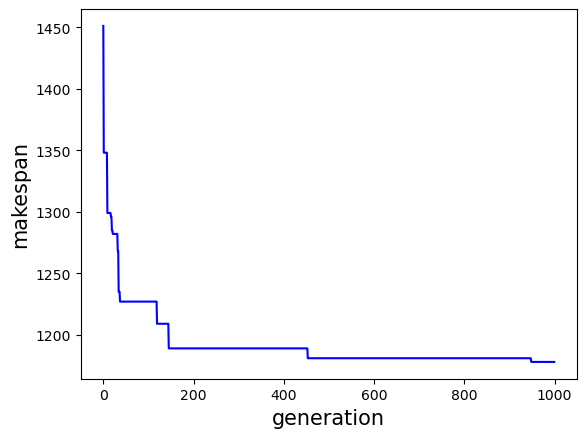

optimal sequence [3, 1, 7, 8, 6, 8, 5, 8, 5, 3, 6, 9, 4, 4, 5, 1, 6, 1, 3, 9, 9, 6, 2, 7, 4, 8, 6, 1, 3, 5, 0, 6, 3, 5, 0, 5, 3, 9, 6, 8, 1, 5, 8, 4, 1, 0, 8, 4, 4, 1, 9, 3, 4, 2, 4, 0, 0, 9, 8, 7, 6, 2, 7, 0, 4, 3, 2, 5, 8, 0, 9, 7, 3, 5, 2, 0, 7, 7, 9, 1, 6, 0, 5, 2, 7, 2, 1, 7, 1, 9, 6, 3, 2, 4, 0, 2, 9, 7, 2, 8]
optimal value:1114.000000
Runtime 20.85395884513855


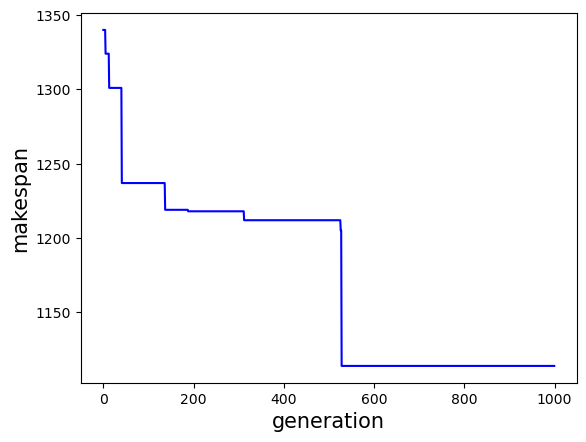

optimal sequence [1, 3, 7, 6, 1, 7, 6, 5, 7, 1, 1, 3, 6, 5, 8, 9, 9, 6, 8, 6, 4, 7, 7, 6, 1, 8, 6, 4, 4, 7, 9, 9, 7, 1, 8, 3, 1, 5, 4, 2, 9, 1, 3, 8, 8, 9, 4, 3, 7, 5, 0, 3, 0, 6, 0, 2, 9, 5, 2, 8, 1, 7, 0, 6, 2, 5, 3, 0, 2, 0, 9, 2, 4, 0, 5, 4, 8, 4, 5, 3, 9, 2, 3, 2, 4, 4, 7, 9, 0, 8, 5, 1, 8, 2, 5, 6, 3, 0, 0, 2]
optimal value:1199.000000
Runtime 21.236528158187866


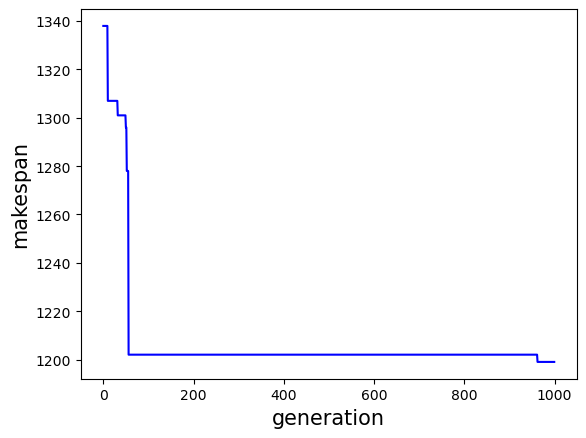

optimal sequence [1, 1, 1, 6, 3, 3, 6, 0, 7, 8, 8, 0, 4, 6, 9, 6, 6, 8, 7, 4, 0, 1, 5, 6, 8, 3, 3, 5, 3, 8, 6, 4, 1, 0, 5, 2, 8, 6, 5, 9, 0, 4, 3, 5, 0, 8, 9, 9, 9, 0, 4, 2, 2, 8, 4, 1, 5, 7, 7, 2, 7, 3, 1, 9, 0, 2, 5, 9, 6, 2, 4, 3, 4, 7, 5, 2, 3, 5, 7, 0, 7, 6, 3, 2, 8, 4, 7, 9, 1, 7, 5, 2, 0, 8, 9, 1, 4, 2, 1, 9]
optimal value:1098.000000
Runtime 22.336776971817017


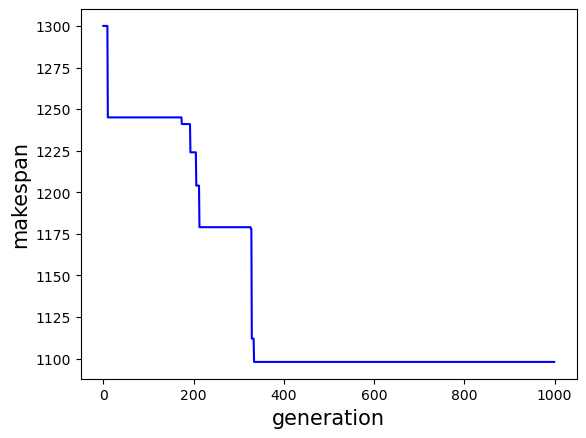

optimal sequence [8, 3, 9, 7, 0, 8, 5, 5, 5, 7, 1, 1, 7, 4, 4, 9, 9, 8, 2, 8, 2, 5, 4, 5, 5, 8, 0, 2, 7, 0, 2, 8, 5, 9, 7, 0, 4, 9, 7, 1, 2, 8, 4, 0, 6, 0, 4, 3, 8, 9, 6, 9, 5, 4, 3, 6, 5, 0, 6, 6, 5, 2, 2, 1, 3, 0, 1, 7, 2, 3, 6, 9, 7, 3, 1, 1, 8, 6, 4, 4, 6, 1, 9, 2, 7, 3, 1, 6, 6, 0, 2, 1, 4, 7, 3, 9, 8, 3, 3, 0]
optimal value:1187.000000
Runtime 20.8513400554657


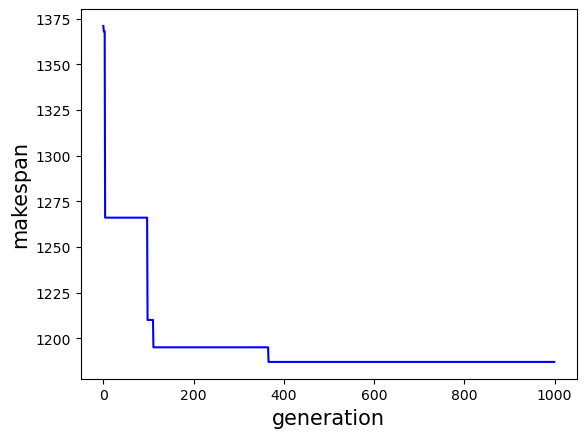

optimal sequence [9, 5, 7, 6, 5, 3, 8, 1, 9, 6, 1, 8, 7, 4, 4, 6, 5, 6, 1, 7, 6, 3, 4, 0, 5, 5, 8, 4, 1, 2, 1, 8, 7, 6, 5, 3, 3, 9, 0, 6, 3, 1, 3, 9, 8, 8, 1, 5, 9, 4, 4, 0, 7, 9, 1, 7, 8, 9, 3, 4, 6, 7, 2, 1, 4, 2, 0, 0, 3, 2, 0, 5, 9, 0, 7, 3, 8, 2, 1, 9, 4, 2, 2, 5, 6, 8, 2, 8, 0, 7, 4, 3, 0, 5, 7, 9, 6, 2, 2, 0]
optimal value:1077.000000
Runtime 21.426804780960083


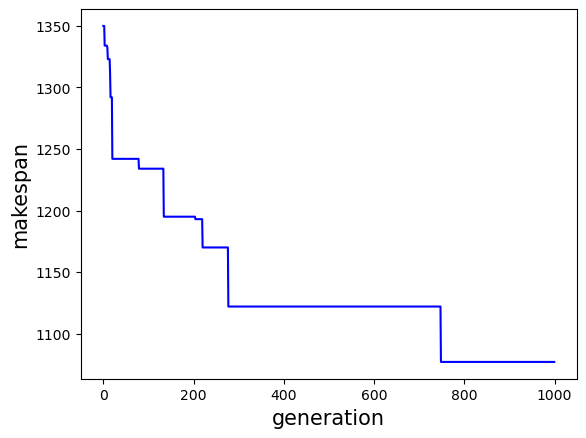

optimal sequence [4, 1, 4, 7, 2, 2, 2, 4, 5, 6, 5, 1, 5, 3, 7, 5, 1, 4, 9, 6, 4, 3, 1, 4, 7, 7, 0, 7, 9, 1, 1, 0, 1, 9, 5, 9, 9, 3, 9, 3, 1, 8, 6, 2, 2, 4, 2, 0, 6, 0, 1, 8, 2, 0, 8, 6, 3, 4, 9, 0, 7, 5, 8, 2, 6, 3, 5, 3, 6, 5, 8, 6, 5, 9, 9, 0, 7, 2, 8, 1, 8, 4, 7, 0, 0, 4, 8, 3, 7, 2, 8, 7, 3, 6, 5, 3, 6, 9, 0, 8]
optimal value:1172.000000
Runtime 21.843493223190308


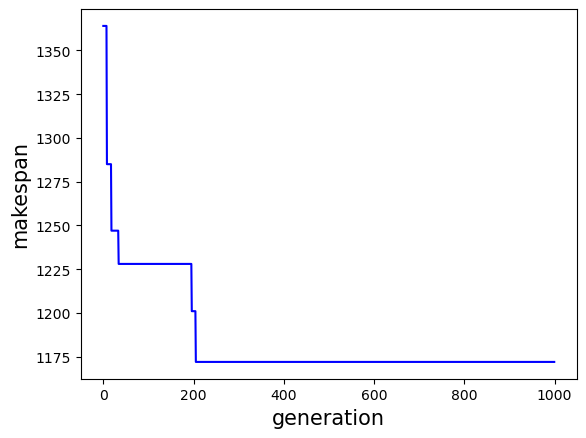

optimal sequence [5, 2, 1, 4, 4, 6, 4, 6, 4, 2, 6, 1, 5, 4, 1, 5, 4, 4, 3, 7, 8, 9, 6, 4, 6, 3, 6, 7, 6, 5, 6, 5, 9, 8, 3, 2, 7, 8, 6, 3, 8, 9, 3, 3, 7, 1, 8, 5, 1, 8, 1, 7, 9, 0, 1, 8, 2, 0, 5, 3, 0, 9, 2, 0, 4, 2, 1, 7, 9, 7, 8, 5, 3, 2, 9, 6, 0, 5, 1, 0, 9, 8, 9, 5, 2, 0, 7, 7, 1, 8, 0, 0, 9, 3, 2, 3, 7, 4, 2, 0]
optimal value:1131.000000
Runtime 22.02486300468445


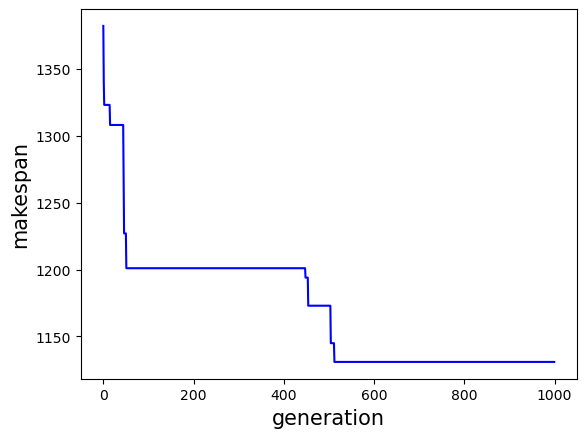

optimal sequence [4, 4, 9, 4, 3, 4, 9, 5, 7, 7, 5, 5, 7, 4, 1, 0, 6, 9, 5, 6, 9, 9, 5, 3, 1, 8, 7, 2, 5, 8, 6, 7, 6, 1, 3, 6, 3, 5, 2, 3, 8, 2, 3, 8, 9, 4, 8, 6, 0, 7, 9, 6, 0, 5, 4, 8, 3, 4, 0, 6, 1, 7, 9, 1, 1, 0, 6, 8, 0, 6, 8, 2, 2, 7, 0, 1, 2, 2, 1, 8, 3, 3, 4, 2, 5, 7, 0, 2, 9, 5, 0, 3, 0, 7, 1, 2, 8, 9, 4, 1]
optimal value:1156.000000
Runtime 20.259882926940918


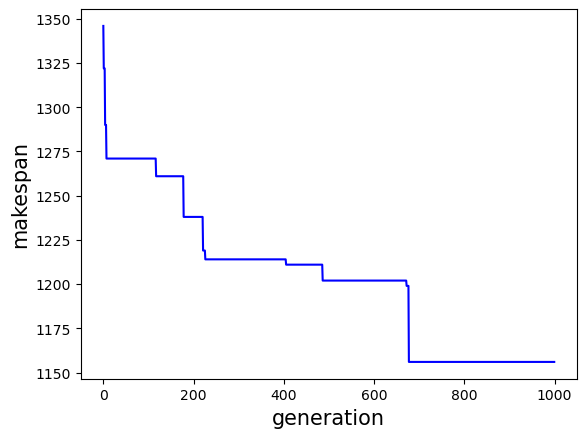

optimal sequence [4, 3, 1, 8, 1, 8, 9, 3, 3, 9, 6, 6, 1, 1, 2, 8, 0, 4, 8, 4, 1, 5, 5, 6, 8, 2, 8, 9, 9, 5, 9, 0, 6, 5, 8, 1, 3, 9, 7, 4, 0, 5, 0, 4, 1, 4, 8, 7, 8, 3, 2, 5, 3, 3, 4, 6, 5, 7, 6, 7, 5, 0, 1, 2, 0, 3, 0, 2, 5, 2, 1, 9, 6, 2, 4, 7, 7, 6, 0, 4, 7, 6, 2, 8, 7, 9, 1, 7, 3, 5, 9, 4, 2, 0, 6, 3, 0, 7, 2, 9]
optimal value:1152.000000
Runtime 21.2538058757782


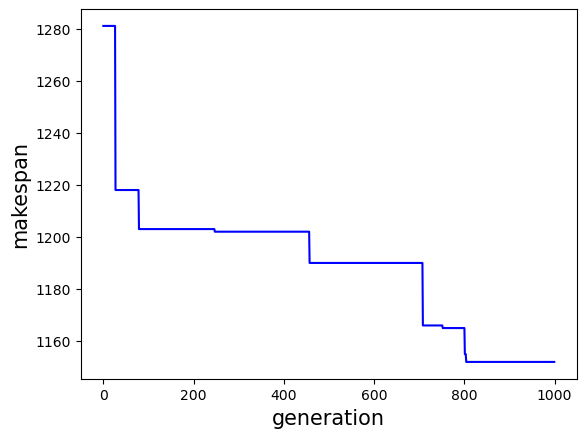

optimal sequence [1, 3, 4, 4, 4, 1, 4, 4, 1, 0, 9, 6, 1, 8, 7, 4, 4, 6, 3, 3, 8, 6, 1, 9, 6, 5, 6, 9, 5, 5, 6, 3, 1, 0, 7, 8, 6, 0, 0, 4, 8, 5, 9, 9, 3, 1, 3, 9, 5, 2, 9, 7, 0, 8, 8, 2, 0, 7, 0, 3, 8, 1, 0, 7, 5, 6, 9, 2, 2, 3, 5, 2, 7, 2, 3, 8, 5, 6, 7, 0, 4, 2, 8, 7, 2, 0, 5, 1, 9, 2, 7, 1, 6, 9, 4, 7, 8, 2, 5, 3]
optimal value:1148.000000
Runtime 20.83833599090576


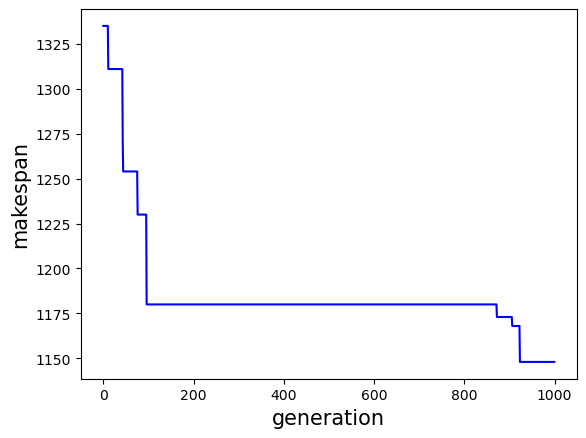

optimal sequence [3, 1, 4, 4, 8, 8, 1, 4, 1, 3, 4, 6, 8, 4, 6, 9, 4, 3, 1, 6, 9, 4, 5, 7, 5, 5, 3, 6, 6, 9, 6, 8, 5, 0, 5, 1, 3, 8, 4, 7, 6, 8, 2, 9, 8, 7, 3, 8, 2, 0, 5, 5, 9, 0, 7, 1, 7, 1, 1, 2, 9, 0, 6, 3, 2, 3, 0, 2, 0, 4, 9, 6, 7, 7, 7, 0, 6, 2, 2, 5, 3, 9, 5, 3, 8, 4, 0, 1, 1, 7, 2, 9, 0, 0, 2, 8, 5, 2, 9, 7]
optimal value:1162.000000
Runtime 21.89535117149353


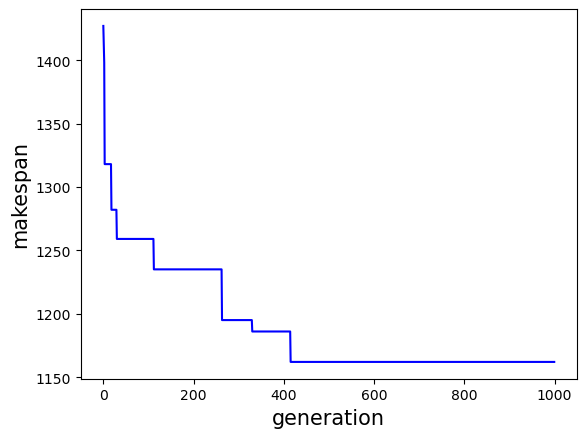

optimal sequence [8, 1, 4, 4, 9, 5, 9, 1, 1, 6, 5, 4, 1, 5, 5, 7, 5, 4, 7, 3, 8, 7, 4, 6, 4, 3, 1, 7, 4, 3, 1, 1, 8, 3, 7, 4, 3, 7, 9, 5, 9, 4, 8, 0, 1, 8, 8, 3, 7, 2, 8, 9, 0, 5, 6, 0, 9, 0, 7, 2, 1, 8, 6, 2, 1, 5, 3, 7, 2, 5, 0, 9, 6, 9, 8, 2, 2, 8, 0, 6, 6, 2, 3, 0, 9, 2, 0, 6, 3, 7, 0, 5, 6, 2, 6, 3, 2, 0, 9, 4]
optimal value:1141.000000
Runtime 20.837404251098633


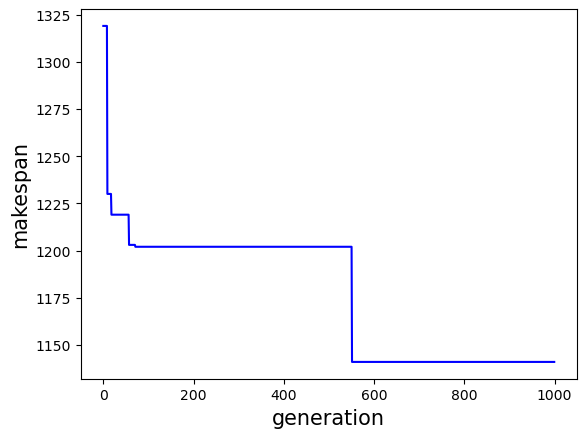

optimal sequence [4, 6, 7, 1, 3, 1, 4, 3, 7, 8, 6, 6, 6, 9, 1, 3, 4, 1, 9, 2, 9, 7, 4, 9, 8, 4, 1, 9, 7, 4, 9, 6, 5, 4, 6, 3, 2, 0, 0, 3, 7, 1, 8, 0, 2, 8, 6, 7, 0, 9, 6, 2, 7, 8, 1, 8, 4, 5, 9, 0, 5, 9, 3, 4, 2, 5, 5, 6, 0, 8, 3, 7, 2, 8, 0, 5, 1, 8, 2, 5, 8, 0, 0, 7, 1, 2, 9, 5, 3, 7, 4, 5, 6, 2, 2, 3, 5, 3, 0, 1]
optimal value:1166.000000
Runtime 22.381927251815796


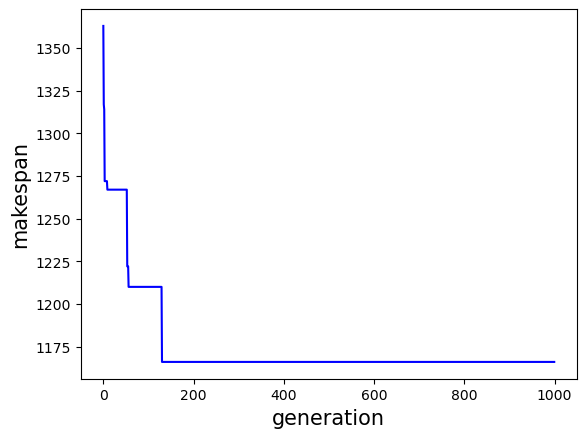

optimal sequence [0, 1, 6, 3, 4, 7, 5, 8, 1, 4, 4, 3, 6, 7, 5, 4, 6, 6, 8, 1, 6, 4, 5, 7, 9, 6, 4, 6, 5, 8, 3, 9, 5, 1, 6, 4, 3, 4, 7, 3, 5, 1, 3, 0, 9, 8, 3, 0, 5, 6, 8, 5, 8, 1, 9, 4, 8, 4, 7, 6, 0, 5, 7, 9, 7, 0, 2, 0, 0, 9, 8, 2, 2, 2, 3, 9, 9, 3, 5, 8, 0, 7, 2, 1, 2, 1, 2, 0, 9, 7, 1, 0, 3, 8, 9, 2, 7, 1, 2, 2]
optimal value:1127.000000
Runtime 21.422366857528687


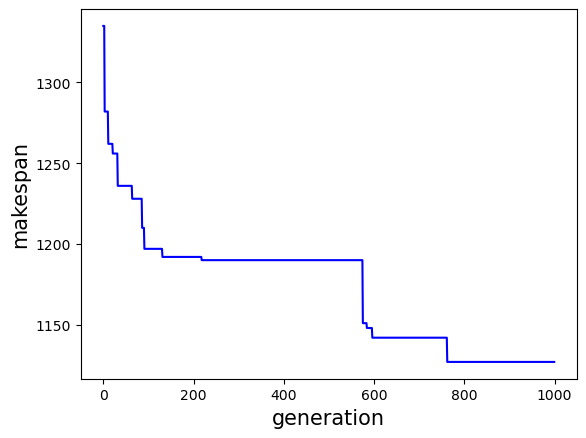

optimal sequence [3, 8, 6, 1, 9, 7, 4, 5, 9, 5, 4, 3, 3, 5, 3, 9, 5, 5, 9, 2, 2, 4, 7, 3, 1, 1, 5, 8, 1, 4, 4, 4, 5, 0, 8, 1, 8, 9, 1, 9, 5, 2, 7, 8, 7, 3, 5, 4, 8, 2, 1, 9, 4, 6, 3, 7, 6, 6, 4, 8, 1, 6, 2, 0, 0, 0, 2, 6, 7, 8, 6, 0, 8, 7, 1, 6, 3, 2, 0, 7, 9, 0, 2, 7, 8, 1, 4, 6, 9, 2, 3, 0, 7, 0, 5, 0, 9, 2, 3, 6]
optimal value:1128.000000
Runtime 21.939015865325928


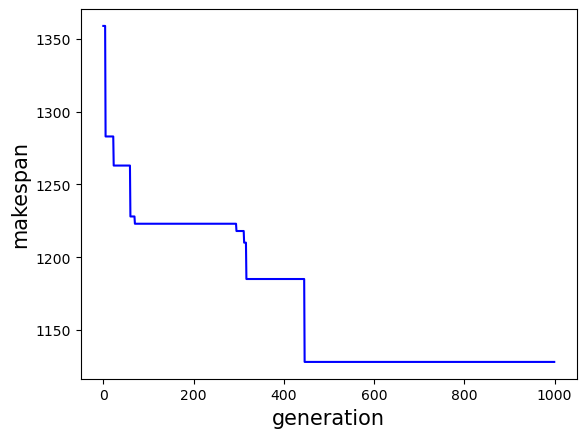

optimal sequence [1, 1, 4, 0, 5, 6, 3, 0, 1, 6, 5, 3, 8, 6, 4, 6, 5, 0, 8, 3, 1, 9, 6, 1, 6, 6, 5, 3, 8, 0, 5, 4, 1, 4, 2, 4, 3, 3, 1, 8, 6, 7, 1, 5, 8, 9, 7, 9, 1, 8, 9, 3, 5, 8, 4, 6, 8, 9, 1, 9, 2, 7, 7, 7, 2, 7, 0, 0, 5, 6, 2, 4, 7, 3, 8, 4, 9, 0, 2, 9, 7, 4, 0, 5, 2, 0, 3, 2, 8, 0, 2, 7, 9, 5, 9, 2, 2, 4, 3, 7]
optimal value:1164.000000
Runtime 21.83017611503601


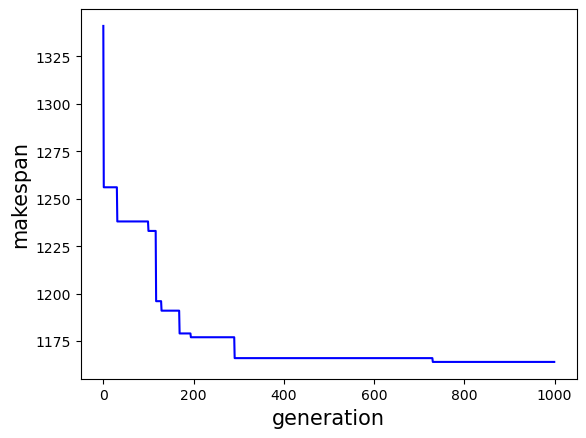

optimal sequence [3, 8, 4, 4, 5, 7, 1, 0, 4, 5, 1, 8, 4, 7, 1, 3, 9, 8, 9, 8, 5, 9, 1, 4, 9, 7, 2, 7, 1, 3, 4, 8, 1, 7, 1, 8, 7, 9, 4, 7, 6, 4, 3, 3, 9, 5, 8, 1, 6, 0, 7, 1, 8, 6, 5, 9, 5, 6, 7, 3, 0, 2, 0, 4, 2, 8, 6, 2, 2, 0, 3, 0, 0, 6, 9, 5, 8, 4, 9, 0, 0, 7, 2, 6, 2, 5, 3, 5, 6, 6, 3, 1, 3, 2, 9, 2, 0, 6, 5, 2]
optimal value:1155.000000
Runtime 22.18240189552307


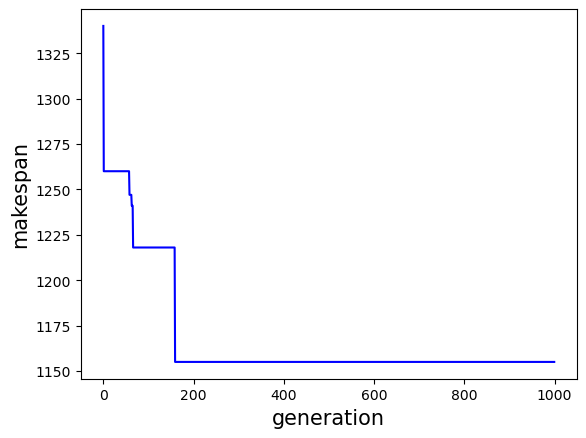

KeyboardInterrupt: 

In [5]:
def genetic_algorithm():
    '''==========Solving job shop scheduling problem by gentic algorithm in python======='''

    ''' ================= initialization setting ======================'''
    pt_tmp=pd.read_excel("ft10.xlsx",sheet_name="Processing Time",index_col =[0])
    ms_tmp=pd.read_excel("ft10.xlsx",sheet_name="Machines Sequence",index_col =[0])

    dfshape=pt_tmp.shape
    num_mc=dfshape[1] # number of machines
    num_job=dfshape[0] # number of jobs
    num_gene=num_mc*num_job # number of genes in a chromosome

    pt=[list(map(int, pt_tmp.iloc[i])) for i in range(num_job)]
    ms=[list(map(int,ms_tmp.iloc[i])) for i in range(num_job)]




    # raw_input is used in python 2
    population_size=100 # default value is 100
    crossover_rate=1
    #float(input('Please input the size of Crossover Rate: ') or 0.8) # default value is 0.8
    mutation_rate=0.1
    #float(input('Please input the size of Mutation Rate: ') or 0.2) # default value is 0.2
    mutation_selection_rate=0.1
    #float(input('Please input the mutation selection rate: ') or 0.2)
    num_mutation_jobs=round(num_gene*mutation_selection_rate)
    num_iteration=1000
        
    start_time = time.time()

    '''==================== main code ==============================='''
    '''----- generate initial population -----'''
    Tbest=999999999999999
    best_list,best_obj=[],[]
    population_list=[]
    makespan_record=[]
    for i in range(population_size):
        nxm_random_num=list(np.random.permutation(num_gene)) # generate a random permutation of 0 to num_job*num_mc-1
        population_list.append(nxm_random_num) # add to the population_list
        for j in range(num_gene):
            population_list[i][j]=population_list[i][j]%num_job # convert to job number format, every job appears m times
            
    for n in range(num_iteration):
        Tbest_now=99999999999           
    
        '''-------- two point crossover --------'''
        parent_list=copy.deepcopy(population_list)
        offspring_list=copy.deepcopy(population_list)
        S=list(np.random.permutation(population_size)) # generate a random sequence to select the parent chromosome to crossover
        
        for m in range(int(population_size/2)):
            crossover_prob=np.random.rand()
            if crossover_rate>=crossover_prob:
                parent_1= population_list[S[2*m]][:]
                parent_2= population_list[S[2*m+1]][:]
                child_1=parent_1[:]
                child_2=parent_2[:]
                cutpoint=list(np.random.choice(num_gene, 2, replace=False))
                cutpoint.sort()
            
                child_1[cutpoint[0]:cutpoint[1]]=parent_2[cutpoint[0]:cutpoint[1]]
                child_2[cutpoint[0]:cutpoint[1]]=parent_1[cutpoint[0]:cutpoint[1]]
                offspring_list[S[2*m]]=child_1[:]
                offspring_list[S[2*m+1]]=child_2[:]
            
        
        '''----------repairment-------------'''
        for m in range(population_size):
            job_count={}
            larger,less=[],[] # 'larger' record jobs appear in the chromosome more than m times, and 'less' records less than m times.
            for i in range(num_job):
                if i in offspring_list[m]:
                    count=offspring_list[m].count(i)
                    pos=offspring_list[m].index(i)
                    job_count[i]=[count,pos] # store the above two values to the job_count dictionary
                else:
                    count=0
                    job_count[i]=[count,0]
                if count>num_mc:
                    larger.append(i)
                elif count<num_mc:
                    less.append(i)
                    
            for k in range(len(larger)):
                chg_job=larger[k]
                while job_count[chg_job][0]>num_mc:
                    for d in range(len(less)):
                        if job_count[less[d]][0]<num_mc:                    
                            offspring_list[m][job_count[chg_job][1]]=less[d]
                            job_count[chg_job][1]=offspring_list[m].index(chg_job)
                            job_count[chg_job][0]=job_count[chg_job][0]-1
                            job_count[less[d]][0]=job_count[less[d]][0]+1                    
                        if job_count[chg_job][0]==num_mc:
                            break     
        
        '''--------mutation--------'''   
        for m in range(len(offspring_list)):
            mutation_prob=np.random.rand()
            if mutation_rate >= mutation_prob:
                m_chg=list(np.random.choice(num_gene, num_mutation_jobs, replace=False)) # chooses the position to mutation
                t_value_last=offspring_list[m][m_chg[0]] # save the value which is on the first mutation position
                for i in range(num_mutation_jobs-1):
                    offspring_list[m][m_chg[i]]=offspring_list[m][m_chg[i+1]] # displacement
                
                offspring_list[m][m_chg[num_mutation_jobs-1]]=t_value_last # move the value of the first mutation position to the last mutation position
    
        
        '''--------fitness value(calculate makespan)-------------'''
        total_chromosome=copy.deepcopy(parent_list)+copy.deepcopy(offspring_list) # parent and offspring chromosomes combination
        chrom_fitness,chrom_fit=[],[]
        total_fitness=0
        for m in range(population_size*2):
            j_keys=[j for j in range(num_job)]
            key_count={key:0 for key in j_keys}
            j_count={key:0 for key in j_keys}
            m_keys=[j+1 for j in range(num_mc)]
            m_count={key:0 for key in m_keys}
            
            for i in total_chromosome[m]:
                gen_t=int(pt[i][key_count[i]])
                gen_m=int(ms[i][key_count[i]])
                j_count[i]=j_count[i]+gen_t
                m_count[gen_m]=m_count[gen_m]+gen_t
                
                if m_count[gen_m]<j_count[i]:
                    m_count[gen_m]=j_count[i]
                elif m_count[gen_m]>j_count[i]:
                    j_count[i]=m_count[gen_m]
                
                key_count[i]=key_count[i]+1
        
            makespan=max(j_count.values())
            chrom_fitness.append(1/makespan)
            chrom_fit.append(makespan)
            total_fitness=total_fitness+chrom_fitness[m]

        
        '''----------selection(roulette wheel approach)----------'''
        pk,qk=[],[]
        
        for i in range(population_size*2):
            pk.append(chrom_fitness[i]/total_fitness)
        for i in range(population_size*2):
            cumulative=0
            for j in range(0,i+1):
                cumulative=cumulative+pk[j]
            qk.append(cumulative)
        
        selection_rand=[np.random.rand() for i in range(population_size)]
        
        for i in range(population_size):
            if selection_rand[i]<=qk[0]:
                population_list[i]=copy.deepcopy(total_chromosome[0])
            else:
                for j in range(0,population_size*2-1):
                    if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                        population_list[i]=copy.deepcopy(total_chromosome[j+1])
                        break
        '''----------comparison----------'''
        for i in range(population_size*2):
            if chrom_fit[i]<Tbest_now:
                Tbest_now=chrom_fit[i]
                sequence_now=copy.deepcopy(total_chromosome[i])
        if Tbest_now<=Tbest:
            Tbest=Tbest_now
            sequence_best=copy.deepcopy(sequence_now)
            
        makespan_record.append(Tbest)
    '''----------result----------'''
    print("optimal sequence",sequence_best)
    print("optimal value:%f"%Tbest)
    run_time = time.time() -start_time
    print('Runtime' , run_time)
    
    import matplotlib.pyplot as plt
    plt.plot([i for i in range(len(makespan_record))],makespan_record,'b')
    plt.ylabel('makespan',fontsize=15)
    plt.xlabel('generation',fontsize=15)
    plt.show()

    return Tbest , run_time 

solutions = []
runtimes = []

for i in range(48):
    solution, runtime = genetic_algorithm()  # Corrected the function call
    solutions.append(solution)
    runtimes.append(runtime)  # Corrected variable name



In [12]:
solutions

[1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292,
 1292]

In [13]:
runtimes




[71.62638783454895,
 83.28959846496582,
 98.68255877494812,
 99.1230788230896,
 98.02804064750671,
 80.47677421569824,
 122.26168656349182,
 125.19677948951721,
 127.6683783531189,
 67.82889747619629,
 69.08597660064697,
 62.427732706069946,
 64.62578225135803,
 66.47958397865295,
 67.5791187286377,
 64.2536473274231,
 72.8707344532013,
 66.49918818473816,
 65.71735119819641,
 63.22135663032532,
 66.4618604183197,
 68.01205062866211,
 68.62225437164307,
 67.39280295372009,
 64.25546598434448,
 64.11453604698181,
 61.066781759262085,
 68.1634418964386,
 66.11147356033325,
 65.7682421207428,
 62.88275647163391,
 62.161147356033325,
 64.0823872089386,
 68.2804012298584,
 68.83595967292786,
 69.80287289619446,
 60.24857997894287,
 63.66446280479431,
 67.4559907913208,
 64.86058259010315,
 67.46616649627686,
 63.2872998714447,
 66.48472929000854,
 65.86017274856567,
 63.89892029762268,
 64.21009731292725,
 69.71097087860107,
 65.27792406082153]